# Introduction
-----

COVID-19 was first discovered in December of 2019 in the Wuhan province of China and has since been classified as a pandemic. COVID-19 is the disease caused by coronavirus (SARS CoV-2) which primarly effects the upper respiratory tract of its victims. In the time of its initial discovery to today, around 38 million cases have been reported and over a million of them have resulted in death worldwide. In addition to the staggering mortality rate, this pandemic has also crippled the global economy, temporarly halted most travel, and is the prime cause of countless lost jobs. 

Due to this disease being caused by a virus, the rate of mutation is high and this poses as a serious challenge in attempts by virology researchers and scientists to create a vaccine. Mutations generally occur to allow the virus to better adapt to its enviroment and since this is a dataset released by the Mexican government, the analysis gathered from this dataset can only valid for Mexico and its neighboring regions. 

Some questions we are looking to answer while analyzing this dataset;
  <ul> 
    <li>Is this a biased dataset?
    <li>What was the rate of hospitalization over time?
    <li>What was the disparity in mortality by test result?
    <li>What was the age distribution of hospitalized patients?
    <li>Were there any trends between pre-existing conditions and mortality rates?
    <li>Which pre-existing conditions effect mortality rates?
    <li>What were some trends amongst the recovered patients?
    <li>What were some trends in recovery based on trreatment methods?
    <li>What have we learned and how does that impact us in regards to COVID saftey?</ul>
    
-----
Thank you to Tanmoy Mukherjee for uploading this dataset on Kaggle.

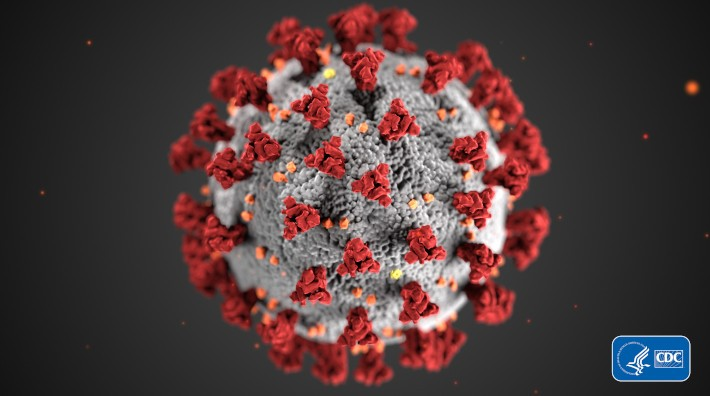

Gathering our data and importing the nescessary packages

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
df = pd.read_csv('covid.csv')
df.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


Cleaning up our dataset and creating visuals - 
Since data isnt always created in a manner that can be properly used, we must format and clean up much of it. These steps include normalizing and standardizing our data, filling in null/missing values, and changing the datatypes to allow for proper analysis

 Data descriptors   
 
     Sex     
         1 = Female
         2 = Male         
     Patient_type     
         1 = Outpatient
         2 = Inpatient         
     Colums with descriptors such as intubed, pneumonia, diabetes, copd...etc     
         1 = Yes
         2 = No
         97,98,99, etc = No Data/Unknown         
     Date died     
         9999-99-99 = Patient recovered
      
Now that we are familiar with the information the dataset is conveying to us, lets move on to the cleaning up steps!

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

Lets begin by fixing the colums which have a Date Object within them; entry_date, date_symptoms, and date_died. The entry_date and date_symptoms columns are straight forward, but the date_died has a placeholder value of 99-99-9999 if the patient survived. We will replace the dates of the survivors to NaN for better visualization.

In [3]:
date_objects=['entry_date','date_symptoms']
for dates in date_objects:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)

Since we know that the values of 97,98, and 99 are codes for null values, lets replace them. We have to make sure to not effect the ages column since they could have actual ages with those values. Also, we have no need for the id column so we will drop it. The column name for covid_res is not ideally labeled so we will change it to test_result. 

In [4]:
# select the needed columns in an organizable order
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

# replacing the null values, and assigning readable values to the other entries
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)

# renaming the covid_res and sex columns
df.rename(columns={'covid_res':'test_result', 'sex':'gender'},inplace=True)

Lets take a look at our edited dataframe

In [5]:
df.head(5)

,gender,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,test_result,icu
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,No,Positive,NaN
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,NaN
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,Positive,No
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,No
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,Positive,No


Now that our dataset is cleaned up, lets take a look at some of the data to gauge the bias.

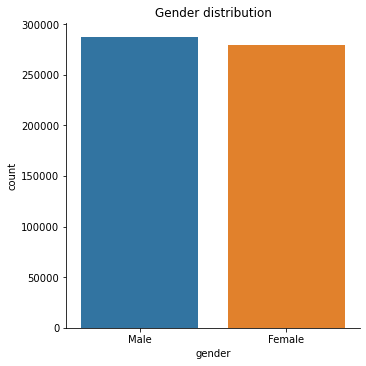

In [6]:
sns.catplot('gender',data=df,kind='count')
plt.title('Gender distribution');

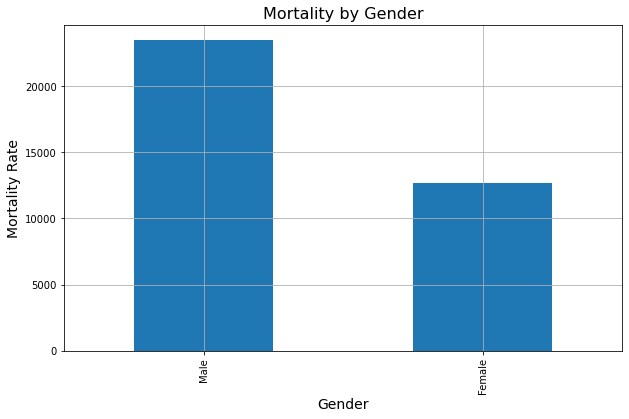

In [7]:
mortality_by_gender = df.query('date_died != "Not Applicable"').gender.value_counts()
mortality_by_gender.plot(x=mortality_by_gender.index, y=mortality_by_gender, kind='bar', figsize=(10, 6), grid=True)
plt.title("Mortality by Gender", fontsize=16)
plt.ylabel('Mortality Rate', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.show()

The ratio of male to female is pretty equal, which shows that there is no general bias in reporting. Intrestingly, we can see that although the ratio of genders by hospitalizations is relatively neutral, there is a disproportionate rate of mortality amongst males compared to females.

To begin our analysis we will first create a time series to look at when patients originally contracted symptoms and the date of their hospital entry. 

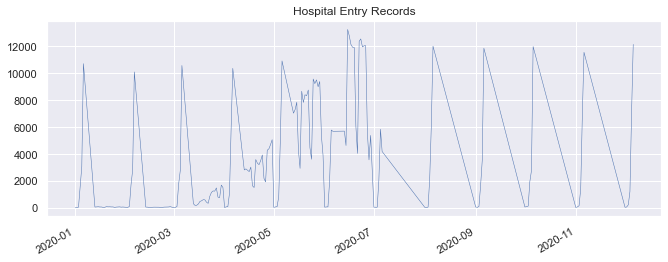

In [8]:
sns.set(rc={'figure.figsize':(11, 4)})
df['entry_date'].value_counts().plot(linewidth=0.5).set_title("Hospital Entry Records");

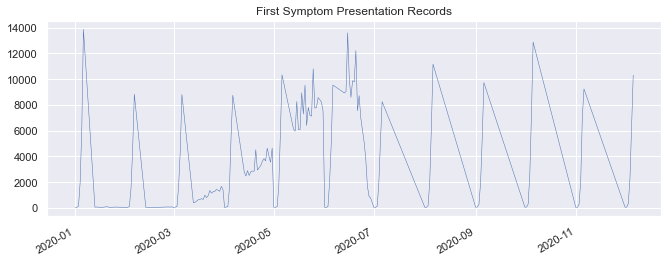

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
df['date_symptoms'].value_counts().plot(linewidth=0.5).set_title("First Symptom Presentation Records");

The graphed output of this data is odd. Since we were not provided with discharge days of each patient, we must assume the cause for so many spikes is either hospitals rapidly filling or that the records were required to be updated at a specific time and this caused hospital employees to enter in mass amounts of data on those days. These are just inferences, but due to a lack of properly identified data, thats all we can do with this information. 

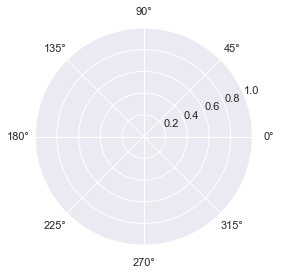

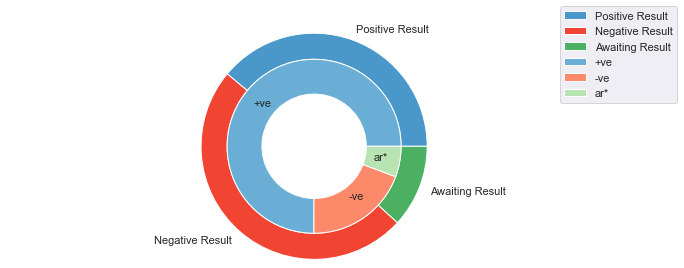

In [10]:
ved = len(df.query('test_result == "Positive" and date_died != "Not Applicable"'))
ve = len(df.query('test_result == "Positive"'))
ned = len(df.query('test_result == "Negative" and date_died != "Not Applicable"'))
ne = len(df.query('test_result == "Negative"'))
nod = len(df.query('test_result == "Results awaited" and date_died != "Not Applicable"'))
no = len(df.query('test_result == "Results awaited"'))

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
# Make data: I have 3 groups and 7 subgroups
group_names=['Positive Result', 'Negative Result', 'Awaiting Result']
group_size=[ve,ne,no]
subgroup_names=['+ve', '-ve', 'ar*']
subgroup_size=[ved, ned, nod]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), 
c(0.3)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(0.9, .7))
# show it
plt.show()

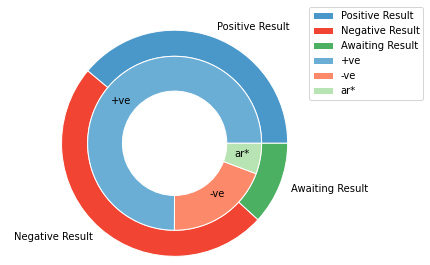
<sup>* = awaiting results<sup>
###### This 2-layer pie chart shows us the test result status on the outter ring, and associcated mortality on the inner ring. This isnt rocket science but the coorelation between a positive test result and mortality is very clear to see.

Lets look at hospitalizations by age group

In [11]:
age_band = [0, 2, 10, 20, 30, 40, 50, 60, 80, 150]
bin_labels = ['less than 2', '2-10', '10-20', '20-30','30-40','40-50','50-60', '60-80', '80+']
df['age_band'] = pd.cut(df.age, age_band, labels=bin_labels)

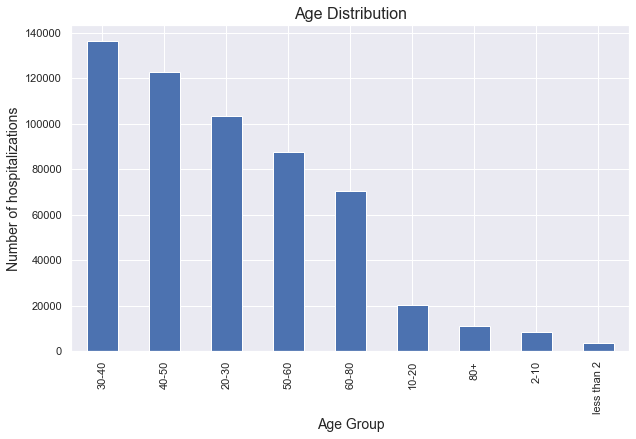

In [12]:
hp = df.age_band.value_counts()
hp.plot(x=hp.index, y=hp, kind='bar', figsize=(10, 6), grid=True)
plt.title("Age Distribution", fontsize=16)
plt.ylabel('Number of hospitalizations', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show()

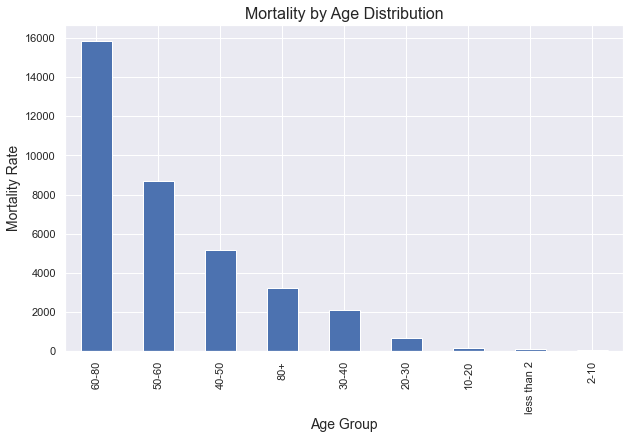

In [13]:
mortality_by_age = df.query('date_died != "Not Applicable"').age_band.value_counts()
mortality_by_age.plot(x=mortality_by_age.index, y=mortality_by_age, kind='bar', figsize=(10, 6), grid=True)
plt.title("Mortality by Age Distribution", fontsize=16)
plt.ylabel('Mortality Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show()

Here we can see a high hospitalization rate for ages 20-50, which can be generally associcated with the working population. Since schools in mexico were under lockdown, the rate of infection amongst their population was controlled. There is a much smaller population of patients over the age of 60, however the rate of mortality amongst that group is the highest by a large factor.

Lets take a look at the number of pre-conditions and look for any coorelations with mortality and overall hospitalizations.

In [14]:
pre_conditions = []
for _ in range(len(df)):
    pre_conditions.append(df.iloc[_, 7:20].str.contains('Yes').sum())
df['pre_conditions'] = pre_conditions

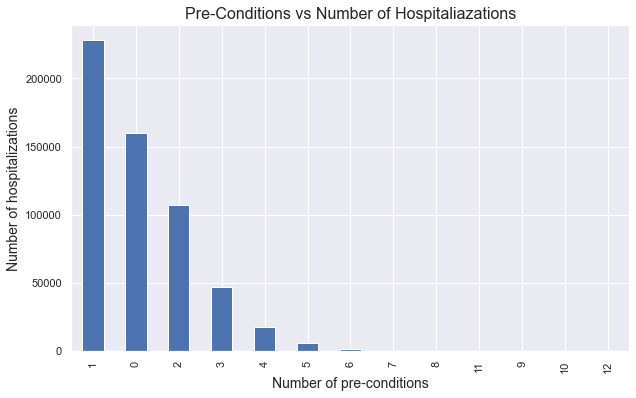

In [15]:
pc = df['pre_conditions'].value_counts()
pc.plot(x=pc.index, y=pc, kind='bar', figsize=(10, 6), grid=True)
plt.title("Pre-Conditions vs Number of Hospitaliazations", fontsize=16)
plt.ylabel('Number of hospitalizations', fontsize=14)
plt.xlabel('Number of pre-conditions', fontsize=14)
plt.show()

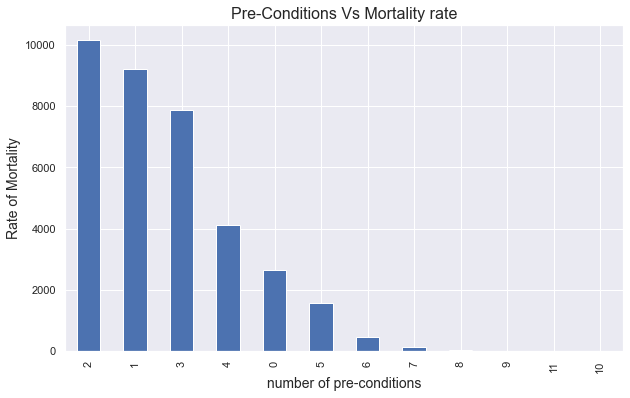

In [16]:
pcd = df.query('date_died != "Not Applicable"').pre_conditions.value_counts()
pcd.plot(x=pcd.index, y=pcd, kind='bar', figsize=(10,6), grid=True)
plt.title("Pre-Conditions Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('number of pre-conditions', fontsize=14)
plt.show()

Here we can see that there is some positive coorelation between overall pre-conditions but it is not a high R rate.
We can look at individual and some groups of pre-conditions to see if we can find a stronger coorelation.

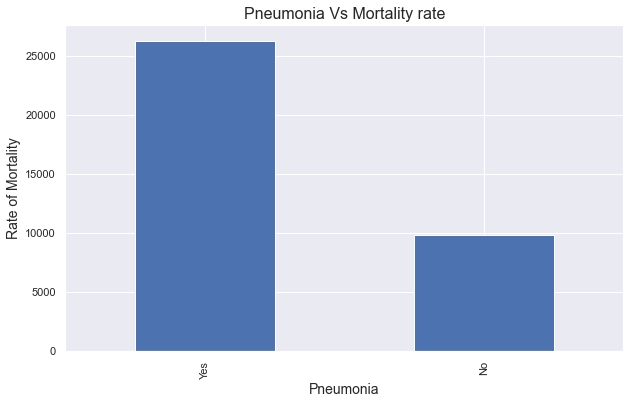

In [17]:
pn = df.query('date_died != "Not Applicable"').pneumonia.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Pneumonia Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Pneumonia', fontsize=14)
plt.show()

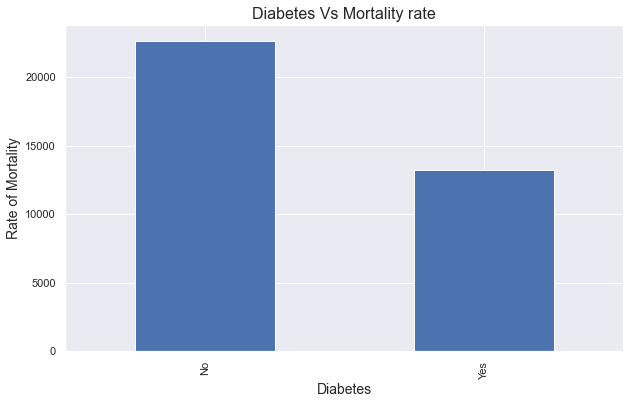

In [18]:
pn = df.query('date_died != "Not Applicable"').diabetes.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Diabetes Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Diabetes', fontsize=14)
plt.show()

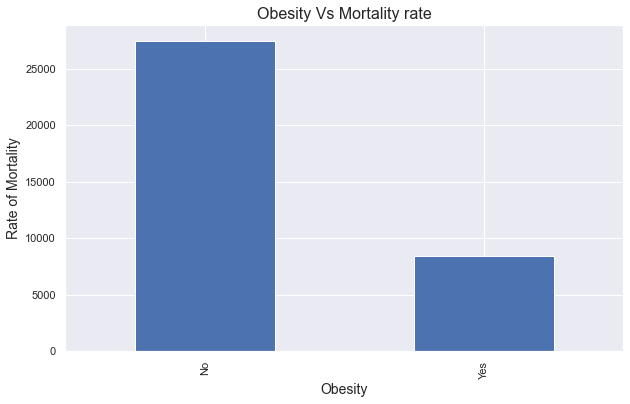

In [19]:
pn = df.query('date_died != "Not Applicable"').obesity.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Obesity Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Obesity', fontsize=14)
plt.show()

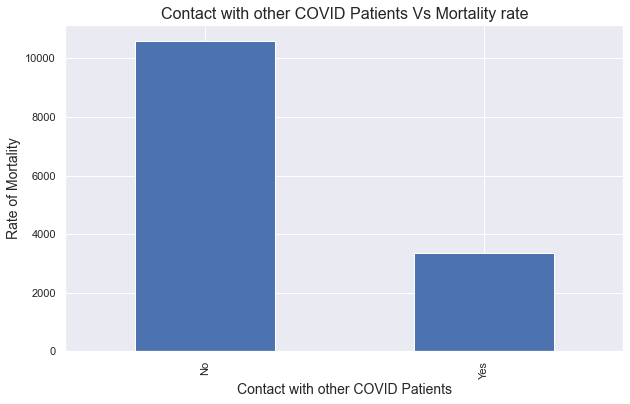

In [20]:
pn = df.query('date_died != "Not Applicable"').contact_other_covid.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Contact with other COVID Patients Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Contact with other COVID Patients', fontsize=14)
plt.show()

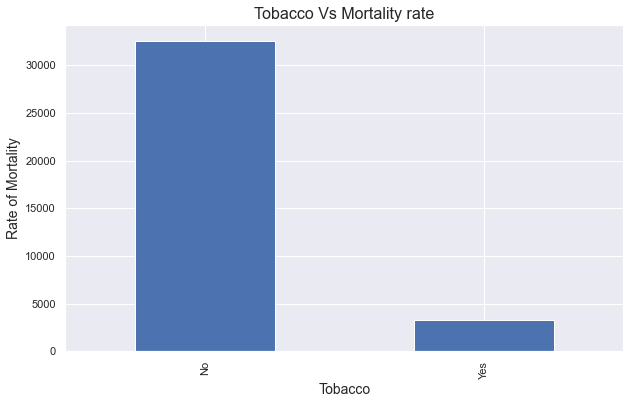

In [21]:
pn = df.query('date_died != "Not Applicable"').tobacco.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Tobacco Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Tobacco', fontsize=14)
plt.show()

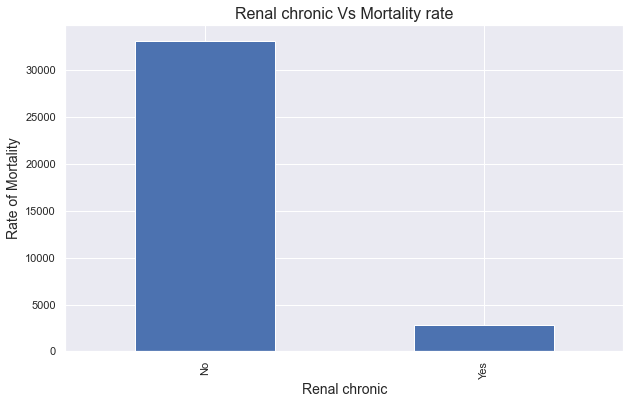

In [22]:
pn = df.query('date_died != "Not Applicable"').renal_chronic.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Renal chronic Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Renal chronic', fontsize=14)
plt.show()

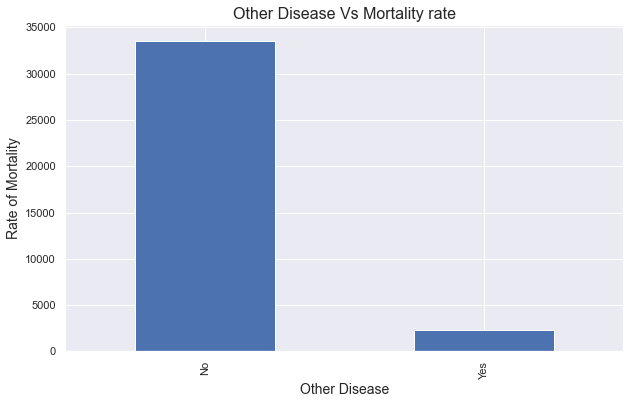

In [23]:
pn = df.query('date_died != "Not Applicable"').other_disease.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Other Disease Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Other Disease', fontsize=14)
plt.show()

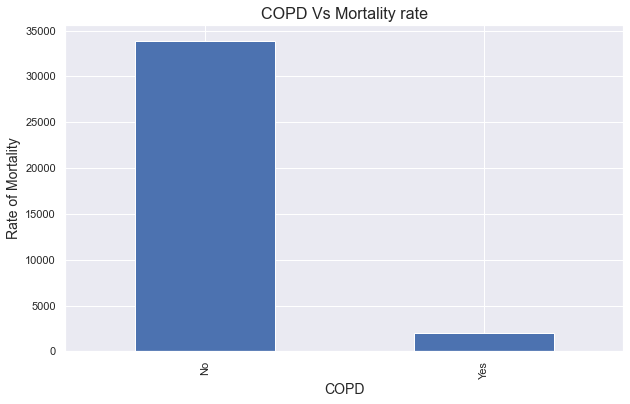

In [24]:
pn = df.query('date_died != "Not Applicable"').copd.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("COPD Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('COPD', fontsize=14)
plt.show()

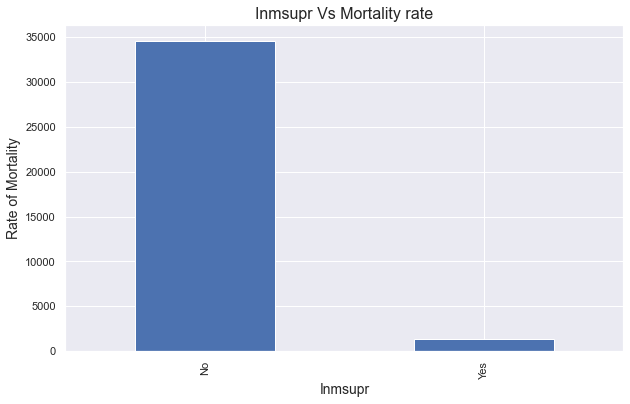

In [25]:
pn = df.query('date_died != "Not Applicable"').inmsupr.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Inmsupr Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Inmsupr', fontsize=14)
plt.show()

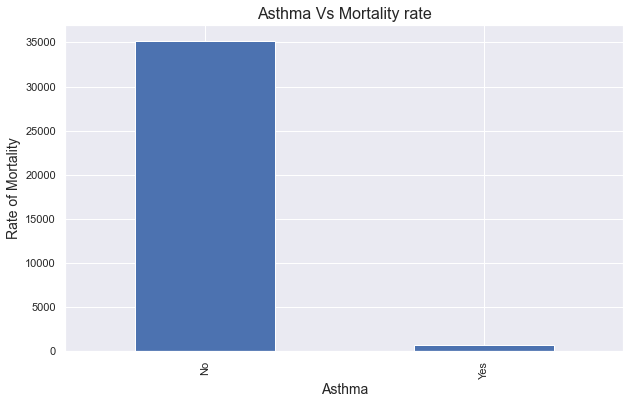

In [26]:
pn = df.query('date_died != "Not Applicable"').asthma.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Asthma Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Asthma', fontsize=14)
plt.show()

By looking at mortality trends for the pre-conditions, we can see that there is a very strong positive coorelation for pneumonia. Knowing that pneumonia is not listed as an official symptom of COVID we can safely say that contracting a pneumonia is near fatal for patients who have COVID or vice versa. For obesity and contact with other COVID patients, the risk factor is significantly higher than the patients who have not. For the other conditions, it seems to have little to no coorelation, which for some is understandable, but for others like Asthma, COPD, and Tobacco use, is surprising. 

Lets take a look at the two columns which are descriptors of treatment; ICU and intubates. The ICU column states wether the patient was adminstered to an ICU bed or not. The intubates column similarly states wether or not the patient was placed on a ventilator.

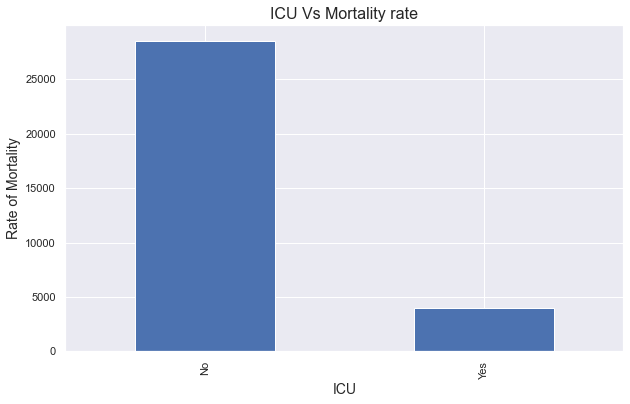

In [27]:
pn = df.query('date_died != "Not Applicable"').icu.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("ICU Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('ICU', fontsize=14)
plt.show()

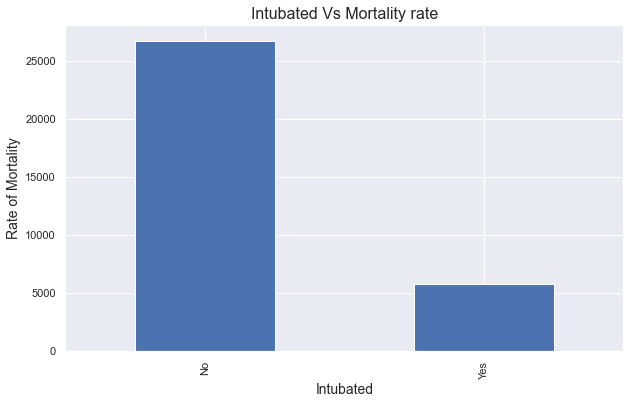

In [28]:
pn = df.query('date_died != "Not Applicable"').intubed.value_counts()
pn.plot(x=pn.index, y=pn, kind='bar', figsize=(10,6), grid=True)
plt.title("Intubated Vs Mortality rate", fontsize=16)
plt.ylabel('Rate of Mortality', fontsize=14)
plt.xlabel('Intubated', fontsize=14)
plt.show()

In [29]:
overall_mortality = df.query("date_died != 'Not Applicable'").shape[0] / df.shape[0]
mortality_intubed = df.query('intubed == "Yes" and date_died != "Not Applicable"').shape[0] / df.query('intubed == "Yes"').shape[0] 
mortality_ICU = df.query('icu == "Yes" and date_died != "Not Applicable"').shape[0] / df.query('icu == "Yes"').shape[0]
mortality_intubed_ICU = df.query('icu == "Yes" and intubed == "Yes" and date_died != "Not Applicable"').shape[0] / df.query('icu =="Yes" and intubed == "Yes"').shape[0]
icu_not_intubed = df.query('icu =="Yes" and intubed !="Yes" and date_died != "Not Applicable"').shape[0] / df.query('icu == "Yes" and intubed !="Yes"').shape[0]
intubed_not_icu = df.query('icu != "Yes" and intubed == "Yes" and date_died != "Not Applicable"').shape[0] / df.query('icu != "Yes" and intubed=="Yes"').shape[0]
print(f"In Mexico, over the given period of time, the overall mortality rate was {round(overall_mortality*100, 2)}%. Compared to this, the mortality rate of intubated patients was {round(mortality_intubed*100, 2)}%, and the mortality rate of patients in ICU beds was {round(mortality_ICU*100, 2)}%")
print(f"The mortality rate for patients who were both intubated and adminstered to ICU beds was {round(mortality_intubed_ICU*100, 2)}%")
print(f"The mortality rate for patients who were in ICU but not intubated was {round(icu_not_intubed*100, 2)}%")
print(f"The mortality rate for patients who were intubated but not in ICU was {round(intubed_not_icu*100, 2)}%")
print(f"The drop in mortality rate for patients who were taken straight to the ICU vs those who were intubated before ICU was {round((mortality_ICU - icu_not_intubed)*100, 2)}%")

In Mexico, over the given period of time, the overall mortality rate was 6.38%. Compared to this, the mortality rate of intubated patients was 58.08%, and the mortality rate of patients in ICU beds was 39.04%
The mortality rate for patients who were both intubated and adminstered to ICU beds was 57.19%
The mortality rate for patients who were in ICU but not intubated was 21.23%
The mortality rate for patients who were intubated but not in ICU was 58.99%
The drop in mortality rate for patients who were taken straight to the ICU vs those who were intubated before ICU was 17.82%


Based on these findings we can see that the rate of survival has a drastic increase for the intubated patients. Since patients who are intubated are generally in near critical condition, it is not an unexpected figure. However the near 20% drop between patients who were in ICU beds vs those who were just intubated is significant. From what the data shows we can assume that patients who were directly taken to the ICU beds before being treated with just ventilators had a survival rate thats almost 18% better than being treated with just a ventilator. This piece of data can mean many things; the hospitals in Mexico could have a lack of ICU beds meaning only so many patients could be administered that treatment, a different progression of symptoms for some patients meaning they could arrive on scene presenting a much severe case casuing them a direct ICU assignment, or oversight of a patients symptoms by their diagnostician. However, since the difference is so high, we can safely rule out the last one since, ideally, there isnt that significant of a professional population that would misdiagnose to this degree. There isn't a clear description in the data about the patients who overlapped in ICU and intubated treatments, meaning we do not know in what order (or if at the same time) these treatments were administered, which could confound the data heavily, however there is a clear positive coorelation between recovery and ICU administration. 

# Conclusion
-----
From the above analysis of this data, we can draw the following conclusions;
<ul>
    <li>Individuals over the age of 60 are most susceptible to death by COVID.
    <li>The chancees of recovery is high for patients aged 20-40, with the chancees decreasing as age increases
    <ll>Males have a higher risk of contracting COVID compared to females.
    <li>For patients with comorbidities such as pneumonia, obesity or cardiovascular diseases, the rate of fatalaties is higher.
    <li>ICU treatment for severe symptoms is effective, whereas isolated ventilator treatment is not as effective.
<ul/>